In [2]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 6.3 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.0 MB 6.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.0 MB 6.2 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 6.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 6.2 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --------------------------- -

In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow

In [2]:
import os
# Define the base path correctly
base_path = r"D:\project_folder\cancer-cells_detection\data\images"

# Update paths for train, validation, and test sets
train_path = os.path.join(base_path, "TRAIN")
valid_path = os.path.join(base_path, "TEST_SIMPLE")
test_path = os.path.join(base_path, "TEST")

# Print paths to verify
print("Train Path:", train_path)
print("Validation Path:", valid_path)
print("Test Path:", test_path)

Train Path: D:\project_folder\cancer-cells_detection\data\images\TRAIN
Validation Path: D:\project_folder\cancer-cells_detection\data\images\TEST_SIMPLE
Test Path: D:\project_folder\cancer-cells_detection\data\images\TEST


In [3]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,=
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 9957 files belonging to 4 classes.


In [4]:
# Get the class labels
labels = training_set.class_names
print(labels)


['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 71 files belonging to 4 classes.


In [6]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()

# Block 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 2
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 3 (Removed Redundant Input Shape)
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 5
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout for Regularization
cnn.add(tf.keras.layers.Dropout(0.4))

# Flattening & Fully Connected Layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))  # Reduced from 1500
cnn.add(tf.keras.layers.Dropout(0.5))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))  # Ensure categorical_crossentropy loss



In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        3

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
312/312 [==============================] - 89s 188ms/step - loss: 1.6894 - accuracy: 0.4461 - val_loss: 7.5441 - val_accuracy: 0.0986
Epoch 2/50
312/312 [==============================] - 28s 90ms/step - loss: 0.5628 - accuracy: 0.7659 - val_loss: 3.6780 - val_accuracy: 0.2254
Epoch 3/50
312/312 [==============================] - 28s 90ms/step - loss: 0.2973 - accuracy: 0.8832 - val_loss: 0.9055 - val_accuracy: 0.8028
Epoch 4/50
312/312 [==============================] - 28s 90ms/step - loss: 0.2088 - accuracy: 0.9207 - val_loss: 1.7535 - val_accuracy: 0.5634
Epoch 5/50
312/312 [==============================] - 28s 90ms/step - loss: 0.1362 - accuracy: 0.9467 - val_loss: 2.7067 - val_accuracy: 0.5634
Epoch 6/50
312/312 [==============================] - 29s 92ms/step - loss: 0.0952 - accuracy: 0.9645 - val_loss: 0.7679 - val_accuracy: 0.7887
Epoch 7/50
312/312 [==============================] - 28s 91ms/step - loss: 0.0869 - accuracy: 0.9692 - val_loss: 5.1477 - val_accuracy

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

312/312 [==============================] - 9s 29ms/step - loss: 0.0840 - accuracy: 0.9787
Training accuracy: 0.9787084460258484


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

3/3 [==============================] - 0s 18ms/step - loss: 1.1273 - accuracy: 0.8592
Validation accuracy: 0.8591549396514893


In [12]:
cnn.save(r"D:\project_folder\cancer-cells_detection\data\images\trained_cancer_model.h5")

In [13]:
training_history.history

{'loss': [1.689377784729004,
  0.5628100037574768,
  0.2972608804702759,
  0.20884189009666443,
  0.13619759678840637,
  0.09515193849802017,
  0.08689745515584946,
  0.07157684862613678,
  0.06616653501987457,
  0.07093698531389236,
  0.05994562804698944,
  0.07078243046998978,
  0.031087767332792282,
  0.021642060950398445,
  0.023960944265127182,
  0.04922885447740555,
  0.02641536295413971,
  0.03885297849774361,
  0.08650842308998108,
  0.018940040841698647,
  0.04086048901081085,
  0.035860225558280945,
  0.012896226719021797,
  0.011807187460362911,
  0.03413359820842743,
  0.04553234577178955,
  0.020670507103204727,
  0.012552034109830856,
  0.021188218146562576,
  0.010319128632545471,
  0.020378397777676582,
  0.06752639263868332,
  0.019871409982442856,
  0.01694180816411972,
  0.030645029619336128,
  0.010716794058680534,
  0.012781222350895405,
  0.0029814771842211485,
  0.012728875502943993,
  0.016612587496638298,
  0.028804386034607887,
  0.021607132628560066,
  0.0109

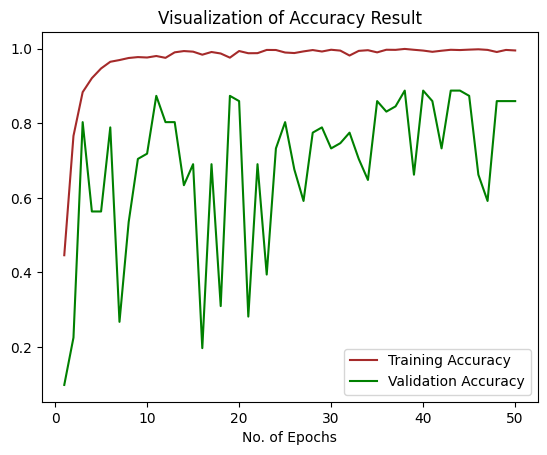

In [15]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()